<a href="https://colab.research.google.com/github/buxkirill/reboot_DA/blob/main/final_project/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime, date, timedelta
import requests
import warnings
warnings.filterwarnings('ignore')
# формат чисел
#pd.options.display.float_format ='{:,.3f}'.format


# Задание

Определение доходности облигаций по данным ММВБ
Disclaimer: данное задание подготовлено исключительно для тренировки навыков
анализа данных, результаты выполнения задания не являются рекомендациями по
операциям с облигациями, автор задания не является инвестиционным
консультантом.
Имеются данные по облигациям, которые торгуются на ММВБ на текущую дату.
Требуется выполнить следующие действия с данными по облигациям на дату
формирования данных:
1. Оценить рынок рублевых облигаций по распределению купонной доходности,
предложить разделение на кластеры по купонной доходности.
Предложить графическое представление полученных групп/кластеров. (график)
2. По низкорисковым рублевым облигациям с датой промежуточной выплаты по
купонам не более 20% купонного периода назад до текущей даты и облигациям
выпущенным в аналогичный период, рассчитать доходность последующих
купонов по отобранным облигациям с учетом разницы номинала и цены продажи,
а также с учетом налоговых отчислений на период год с текущей дата. (график
и/или таблица).
3. Допускается обоснованное изменение условий как по критериям оценки рынка,
так с учетом выбранной стратегии инвестирования.
Датасет с данными расположен по адресу:
https://iss.moex.com/iss/apps/infogrid/emission/rates.csv?iss.dp=comma&iss.df=%25d.%25m.
%25Y&iss.tf=%25H:%25M:%25S&iss.dtf=%25d.%25m.%25Y%25H:%25M:%25S&iss.only=rates&li
mit=unlimited&lang=ru
На усмотрение слушателя:
• можно скачать и загрузить в вашем скрипте файл csv (например,
pd.read_csv с указанием русской кодировки, релевантного знака
сепарирования и номера строки заголовков),
• загружать on-line:
s=requests.get(bond_url).content
pd.read_csv(io.StringIO(s.decode('УКАЗАТЬ КОДИРОВКУ')), sep='СЕПАПРАТОР', header=№ СТРОКИ
ЗАГОЛОВКОВ)
Могут быть использованы следующие поля (а также все остальные) в любых
комбинациях:

'SECID' - Код ценной бумаги,
'SHORTNAME' - Краткое наименование,
'NAME' Полное наименование,
'FACEVALUE' - Номинальная стоимость,
FACEUNIT' - валюта,
'DURATION' - дюрация,
'IS_QUALIFIED_INVESTORS' - признак продукта для квалифицированных инвесторов,
'HIGH_RISK' - признак уровня риска,
'COUPONFREQUENCY' – число купонов в год,
'COUPONDATE' - Дата выплаты купона,
'COUPONPERCENT' - Ставка купона, %,
'COUPONVALUE' - Сумма купона, в валюте номинала, 
'OFFERDATE' - Дата оферты,
'EMITENTNAME' – наименование эмитента,
'INN' – ИНН эмитента,
'PRICE' – текущий % от FACEVALUE,
'PRICE_RUB' - котировка,

Пояснения:
1. Для получения текущей даты можно использовать метод datetime.date.today();

2. Период расчета доходности рекомендуется выбирать 365 дней с текущей даты;

3. Нужно учитывать накопленный купонный доход (НКД) и разницу котировки и номинала ;

4. В общем случае процентный доход при ставке НДФЛ 13% будет
Profit =(Цена_Номинальная – Цена_покупки – НКД + 0.87*Купонный_доход_руб*X_лет)*100% /(Цена_покупки + НКД) (комиссией брокера
пренебрегаем)

5. Период расчета НКД: df['COUPONDAYSPASSED']/df['COUPONLENGTH'] , рекомендуется
выбирать меньше или равный 0.2.
Если удовлетворяет условию, полученная величина умножается
на COUPONPERCENT/COUPONFREQUENCY.

6. Датасет содержит данные, которые нужно преобразовывать в форматы python, а также
пустые и искаженные данные, с которыми нужно что-то решить.

# Описание данных

1. **SECID** - Код ценной бумаги
2. **SHORTNAME**- Краткое наименование 
3. '**NAME**' - Полное наименование
4. '**TYPENAME**' - Вид/категория ценной бумаги
5. '**ISIN**' - ISIN код
6. '**REGNUMBER**' - номер выпуска
7. '**LISTLEVEL**' - Уровень листинга
8. '**FACEVALUE**' - Номинальная стоимость
9. '**FACEUNIT**' - валюта
10. '**ISSUESIZE**' - Объем выпуска
11. 'IS_COLLATERAL' - 
12. '**IS_EXTERNAL**' - внешний
13. '**PRIMARY_BOARDID**' - Идентификатор режима торгов
14. '**PRIMARY_BOARD_TITLE**' - Режим торгов
15. '**MATDATE**' - Дата погашения
16. 'IS_RII'
17. '**ISSUEDATE**' - Дата начала торгов
18. '**EVENINGSESSION**' - Вечерняя сессия
19. '**DURATION**' - дюрация
20. **IS_QUALIFIED_INVESTORS** - признак продукта для 
квалифицированных инвесторов
21. '**HIGH_RISK**' - признак уровня риска
22. '**COUPONFREQUENCY**' – число купонов в год
23. '**YIELDATWAP**' - Доходность по средневзвешенной цене
24. '**COUPONDATE**' - Дата выплаты купона
25. '**COUPONPERCENT**' - Ставка купона
26. '**COUPONVALUE**' - Сумма купона
27. '**COUPONDAYSPASSED**' - прошло дней с выплаты купона
28. '**COUPONDAYSREMAIN**' - дней до выплаты купона
29. '**COUPONLENGTH**' - периодичность выплаты купона
30. '**ISSUEDATE.1**' - Дата начала торгов
31. '**INITIALFACEVALUE**' - Номинальная стоимость
32. '**SECSUBTYPE**' - Подтип облигации
33. '**STARTDATEMOEX**' - Дата начала торгов на Московской Бирже
34. '**DAYSTOREDEMPTION**' - Дней до погашения
35. '**OFFERDATE**' - Дата оферты
36. '**EMITENTNAME**' – наименование эмитента
37. '**INN**' – ИНН эмитента
38. '**LOTSIZE**' - Размер лота, ц.б.
39. '**PRICE**' – текущий % от FACEVALUE
40. '**PRICE_RUB**' - котировка
41. 'RTL1'
42. 'RTH1'
43. 'RTL2'
44. 'RTH2'
45. 'RTL3'
46. 'RTH3'
47. 'DISCOUNT1'
48. 'LIMIT1'
49. 'DISCOUNT2'
50. 'LIMIT2'
51. 'DISCOUNT3'
52. 'DISCOUNTL0'
53. 'DISCOUNTH0'

# Загрузка даных от 08.10.2021

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1kerEidv4dqdOUqeKHDgGHidY5uHZohGn' -O './rates.csv'
KEY_RATE = pd.read_html('https://www.cbr.ru/hd_base/KeyRate/')[0]['Ставка'][0]/100
INVEST_PERIOD = 365
TAX_RATE = 0.13

In [18]:
df = pd.read_csv('rates.csv', sep=';', header=1, encoding='cp1251', dtype={'INN': 'string', 'LISTLEVEL': 'object'})
df.sample(5)

,SECID,SHORTNAME,NAME,TYPENAME,ISIN,REGNUMBER,LISTLEVEL,FACEVALUE,FACEUNIT,ISSUESIZE,IS_COLLATERAL,IS_EXTERNAL,PRIMARY_BOARDID,PRIMARY_BOARD_TITLE,MATDATE,IS_RII,DURATION,ISSUEDATE,EVENINGSESSION,IS_QUALIFIED_INVESTORS,HIGH_RISK,COUPONFREQUENCY,YIELDATWAP,COUPONDATE,COUPONPERCENT,COUPONVALUE,COUPONDAYSPASSED,COUPONDAYSREMAIN,COUPONLENGTH,ISSUEDATE.1,INITIALFACEVALUE,SECSUBTYPE,STARTDATEMOEX,DAYSTOREDEMPTION,OFFERDATE,EMITENTNAME,INN,LOTSIZE,PRICE,PRICE_RUB,RTL1,RTH1,RTL2,RTH2,RTL3,RTH3,DISCOUNT1,LIMIT1,DISCOUNT2,LIMIT2,DISCOUNT3,DISCOUNTL0,DISCOUNTH0
43,RU000A0JS4Z7,ВЭБ.РФ 21,ВЭБ.РФ об. сер. 21,Корпоративные облигации,RU000A0JS4Z7,4-26-00004-T,1,"1000,0",RUB,15000000.0,1,0,TQCB,Т+: Облигации - безадрес.,17.02.2032,NaN,145.0,13.03.2012,0,0,0,2.0,"8,02",01.03.2022,"8,820","43,98",38.0,144.0,182.0,13.03.2012,"1000,0",NaN,2012-04-09,3784.0,2022-03-03,"государственная корпорация развития ""ВЭБ.РФ""",7750004150,1,"100,48","1013,98","892,3","1135,66","861,88","1166,08","831,46","1196,5","12,0",300000.0,"15,0",1500000.0,"18,0","13,00","10,00"
1439,RU000A101TA2,УрожайБО01,Урожай БО-01,Биржевые облигации,RU000A101TA2,4B02-01-00007-L,3,"1000,0",RUB,150000.0,0,0,TQIR,Т+ Облигации ПИР - безадрес.,15.06.2023,NaN,551.0,18.06.2020,0,0,1,2.0,"12,12",16.12.2021,"13,000","64,82",113.0,69.0,182.0,18.06.2020,"1000,0",NaN,2020-06-18,615.0,NaN,"Общество с ограниченной ответственностью ""Урожай""",6414002211,1,"101,79","1058,15",NaN,"2116,3",NaN,"2116,3",NaN,"2116,3","100,0",NaN,NaN,NaN,NaN,NaN,NaN
411,RU000A0JXJM3,СМП 02,"АО ""СМП Банк"" обл.02",Корпоративные облигации,RU000A0JXJM3,40203368B,3,"1000,0",RUB,2000000.0,0,0,TQCB,Т+: Облигации - безадрес.,NaN,NaN,NaN,14.03.2017,0,0,0,2.0,NaN,18.12.2021,"6,000","29,92",111.0,71.0,182.0,14.03.2017,"1000,0",Субординированные облигации,2017-03-14,NaN,NaN,"Акционерное общество Банк ""Северный морской путь""",7750005482,1,"100,13","1019,55",NaN,"2039,1",NaN,"2039,1",NaN,"2039,1","100,0",NaN,NaN,NaN,NaN,"10,00","10,00"
2552,XS2091672803,BCS12/24-D,BCS SP Plc Series 75,Корпоративные еврооблигации,XS2091672803,NaN,3,"100000,0",RUB,6000.0,0,1,TQCB,Т+: Облигации - безадрес.,30.12.2024,NaN,966.0,11.12.2019,1,1,0,2.0,NaN,30.12.2021,"11,000","5515,0684",100.0,83.0,183.0,11.12.2019,"100000,0",NaN,2019-12-16,1179.0,NaN,БрокерКредитСервис Стракчэрд Продактс ПиЭлСи (...,0010035220,1,"81,93","81930,0",NaN,"163860,0",NaN,"163860,0",NaN,"163860,0","100,0",NaN,NaN,NaN,NaN,NaN,NaN
1162,RU000A1014B9,О'КЕЙ Б1Р3,"""О'КЕЙ"" ООО БО 001Р-03",Биржевые облигации,RU000A1014B9,4B02-03-36415-R-001P,3,"1000,0",RUB,5000000.0,0,0,TQCB,Т+: Облигации - безадрес.,26.11.2024,NaN,754.0,03.12.2019,0,0,0,4.0,"8,68",30.11.2021,"7,850","19,57",38.0,53.0,91.0,03.12.2019,"1000,0",NaN,2019-12-03,1145.0,NaN,"Общество с ограниченной ответственностью ""О'КЕЙ""",7826087713,1,"98,74","995,57",NaN,"1991,14",NaN,"1991,14",NaN,"1991,14","100,0",NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
USELESS_COLS = [#'SECID', 
                'SHORTNAME', 'NAME', 'ISIN', 'REGNUMBER', 'EMITENTNAME', 'INN', 'LOTSIZE', 'PRIMARY_BOARD_TITLE' , 'INITIALFACEVALUE', 'ISSUESIZE']

CATEGORICAL_COLS = ['TYPENAME', 'LISTLEVEL', 'FACEUNIT', 'PRIMARY_BOARDID', 'SECSUBTYPE', 'COUPONFREQUENCY', 'IS_RII']

BINARY_COLS = ['IS_COLLATERAL', 'IS_EXTERNAL', 'IS_QUALIFIED_INVESTORS', 'EVENINGSESSION', 'HIGH_RISK']

DATE_COLS = ['MATDATE', 'ISSUEDATE', 'COUPONDATE', 'ISSUEDATE.1', 'STARTDATEMOEX', 'OFFERDATE']

COLS_CONVERT_TO_FLOAT = ['FACEVALUE', 'COUPONPERCENT', 'COUPONVALUE', 'PRICE', 'PRICE_RUB', 'RTL1', 'RTH1', 'RTL2', 'RTH2', 'RTL3', 'RTH3', 'DISCOUNT1', 'DISCOUNT2', 'DISCOUNT3', 'DISCOUNTL0', 'DISCOUNTH0']

In [20]:
# удаляем не нужные столбцы
df.drop(USELESS_COLS, axis=1, inplace=True)

# изменяем формат временных колонок
for col in DATE_COLS:
  df[col] = pd.to_datetime(df[col])

# изменяем формат численных колонок
for col in COLS_CONVERT_TO_FLOAT:
  df[col] = df[col].str.replace(',', '.').astype('float64')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680 entries, 0 to 2679
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TYPENAME                2680 non-null   object        
 1   LISTLEVEL               2426 non-null   object        
 2   FACEVALUE               2680 non-null   float64       
 3   FACEUNIT                2680 non-null   object        
 4   IS_COLLATERAL           2680 non-null   int64         
 5   IS_EXTERNAL             2680 non-null   int64         
 6   PRIMARY_BOARDID         2680 non-null   object        
 7   MATDATE                 2632 non-null   datetime64[ns]
 8   IS_RII                  18 non-null     object        
 9   DURATION                1832 non-null   float64       
 10  ISSUEDATE               2535 non-null   datetime64[ns]
 11  EVENINGSESSION          2680 non-null   int64         
 12  IS_QUALIFIED_INVESTORS  2680 non-null   int64   

In [12]:
df.describe()

,FACEVALUE,IS_COLLATERAL,IS_EXTERNAL,DURATION,EVENINGSESSION,IS_QUALIFIED_INVESTORS,HIGH_RISK,COUPONFREQUENCY,COUPONPERCENT,COUPONVALUE,COUPONDAYSPASSED,COUPONDAYSREMAIN,COUPONLENGTH,DAYSTOREDEMPTION,PRICE,PRICE_RUB,RTL1,RTH1,RTL2,RTH2,RTL3,RTH3,DISCOUNT1,LIMIT1,DISCOUNT2,LIMIT2,DISCOUNT3,DISCOUNTL0,DISCOUNTH0
count,2.680000e+03,2680.000000,2680.000000,1832.000000,2680.000000,2680.000000,2680.000000,2306.000000,2564.000000,2.564000e+03,2666.000000,2666.000000,2666.000000,2632.000000,2496.000000,2.496000e+03,8.740000e+02,2.496000e+03,8.740000e+02,2.496000e+03,8.200000e+02,2.496000e+03,2680.000000,8.740000e+02,874.000000,8.740000e+02,874.000000,1016.000000,1016.000000
mean,2.039089e+06,0.141791,0.154478,852.186681,0.129851,0.181343,0.061194,3.042931,6.264174,3.930707e+03,143.677794,228.510128,372.187922,1663.916793,98.785549,2.633878e+05,2.644914e+05,4.341612e+05,2.568675e+05,4.368308e+05,2.638952e+05,4.400792e+05,72.608396,3.351853e+05,18.918192,1.675320e+06,25.975400,21.000984,20.314961
std,9.665237e+07,0.348901,0.361473,698.977749,0.336202,0.385374,0.239731,2.279280,4.237539,4.946528e+04,230.732531,469.702978,612.937077,1942.641788,13.684232,2.109163e+06,1.762889e+06,3.744338e+06,1.714082e+06,3.754701e+06,1.718261e+06,3.765491e+06,39.756854,8.353152e+05,9.823494,4.176759e+06,21.062084,27.628981,27.689930
min,1.950000e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,3.000000e-03,-20.000000,1.000000,14.000000,0.000000,0.100000,1.100000e+00,1.531000e+01,2.200000e+00,1.482000e+01,2.200000e+00,1.434000e+01,2.200000e+00,3.000000,1.700000e+01,4.000000,8.500000e+01,5.000000,4.000000,4.000000
25%,1.000000e+03,0.000000,0.000000,364.750000,0.000000,0.000000,0.000000,2.000000,1.625000,1.027000e+01,29.000000,41.000000,91.000000,599.000000,97.080000,9.724500e+02,8.328825e+02,1.181535e+03,8.041425e+02,1.211987e+03,7.829900e+02,1.251780e+03,20.000000,1.000000e+05,12.000000,5.000000e+05,15.000000,10.000000,10.000000
50%,1.000000e+03,0.000000,0.000000,723.500000,0.000000,0.000000,0.000000,2.000000,7.000000,2.742000e+01,73.000000,76.000000,182.000000,1139.500000,99.965000,1.010765e+03,8.938800e+02,1.973850e+03,8.630500e+02,1.973850e+03,8.367100e+02,1.982810e+03,100.000000,2.000000e+05,17.000000,1.000000e+06,20.000000,10.000000,10.000000
75%,1.000000e+03,0.000000,0.000000,1126.500000,0.000000,0.000000,0.000000,4.000000,8.900000,3.964000e+01,143.000000,153.000000,183.000000,1889.000000,101.400000,1.066263e+03,9.566325e+02,2.095895e+03,9.272800e+02,2.095895e+03,9.130075e+02,2.099600e+03,100.000000,3.000000e+05,21.000000,1.500000e+06,26.000000,15.000000,10.000000
max,5.000000e+09,1.000000,1.000000,5660.000000,1.000000,1.000000,1.000000,12.000000,24.000000,1.056823e+06,4537.000000,5353.000000,7304.000000,32591.000000,198.210000,6.679351e+07,1.736805e+07,1.335870e+08,1.659613e+07,1.335870e+08,1.582422e+07,1.335870e+08,100.000000,1.200000e+07,62.000000,6.000000e+07,100.000000,100.000000,100.000000


In [13]:
df.isna().sum()

TYPENAME                     0
LISTLEVEL                  254
FACEVALUE                    0
FACEUNIT                     0
IS_COLLATERAL                0
IS_EXTERNAL                  0
PRIMARY_BOARDID              0
MATDATE                     48
IS_RII                    2662
DURATION                   848
ISSUEDATE                  145
EVENINGSESSION               0
IS_QUALIFIED_INVESTORS       0
HIGH_RISK                    0
COUPONFREQUENCY            374
YIELDATWAP                1457
COUPONDATE                  14
COUPONPERCENT              116
COUPONVALUE                116
COUPONDAYSPASSED            14
COUPONDAYSREMAIN            14
COUPONLENGTH                14
ISSUEDATE.1                145
SECSUBTYPE                2545
STARTDATEMOEX              288
DAYSTOREDEMPTION            48
OFFERDATE                 2158
PRICE                      184
PRICE_RUB                  184
RTL1                      1806
RTH1                       184
RTL2                      1806
RTH2    

# Задание 1

In [31]:
df = df[df.FACEUNIT == 'RUB']
df = df[df.IS_QUALIFIED_INVESTORS == 0]
df = df[df.HIGH_RISK == 0]
df = df[df.PRICE_RUB.notna()]
df = df[(df.COUPONDAYSPASSED / df.COUPONLENGTH) <= 0.2]
df['MAX_INVEST_DATE'] = df.apply(lambda x: min(x.MATDATE, (date.today() + timedelta(days=INVEST_PERIOD))), axis=1)
df['INVEST_DAYS'] = df.apply(lambda x: (x.MAX_INVEST_DATE - (datetime.combine(date.today(), datetime.min.time()))).days, axis=1)
df['COUPON_INCOME'] = (df.INVEST_DAYS / 365) * df.COUPONFREQUENCY * df.COUPONVALUE
df['CURRENT_YIELD'] = df.COUPONVALUE * df.COUPONDAYSPASSED / df.COUPONLENGTH
df['PROFIT'] = (df.FACEVALUE - df.PRICE_RUB - df.CURRENT_YIELD + (1 - TAX_RATE) * df.COUPON_INCOME * 100) / (df.PRICE_RUB + df.CURRENT_YIELD)
df.head()

,SECID,TYPENAME,LISTLEVEL,FACEVALUE,FACEUNIT,IS_COLLATERAL,IS_EXTERNAL,PRIMARY_BOARDID,MATDATE,IS_RII,DURATION,ISSUEDATE,EVENINGSESSION,IS_QUALIFIED_INVESTORS,HIGH_RISK,COUPONFREQUENCY,YIELDATWAP,COUPONDATE,COUPONPERCENT,COUPONVALUE,COUPONDAYSPASSED,COUPONDAYSREMAIN,COUPONLENGTH,ISSUEDATE.1,SECSUBTYPE,STARTDATEMOEX,DAYSTOREDEMPTION,OFFERDATE,PRICE,PRICE_RUB,RTL1,RTH1,RTL2,RTH2,RTL3,RTH3,DISCOUNT1,LIMIT1,DISCOUNT2,LIMIT2,DISCOUNT3,DISCOUNTL0,DISCOUNTH0,MAX_INVEST_DATE,INVEST_DAYS,COUPON_INCOME,CURRENT_YIELD,PROFIT
17,RU000A0JQAM6,Корпоративные облигации,1,1000.0,RUB,0,0,TQCB,2028-09-15,NaN,1957.0,2009-08-27,0,0,0,2.0,"-15,82",2022-03-15,9.25,45.87,23.0,158.0,181.0,2009-08-27,NaN,NaT,2534.0,NaT,112.08,1126.63,675.98,1577.28,619.65,1633.61,563.32,1689.95,40.0,200000.0,45.0,1000000.0,50.0,10.0,10.0,2022-10-09,365.0,91.740000,5.828785,6.930867
26,RU000A0JRU20,Корпоративные облигации,3,851.0,RUB,0,0,TQCB,2031-09-26,NaN,1636.0,2011-10-21,0,0,0,2.0,NaN,2022-08-04,9.68,41.08,0.0,182.0,182.0,2011-10-21,NaN,2011-12-15,3640.0,NaT,94.70,805.90,NaN,1611.80,NaN,1611.80,NaN,1611.80,100.0,NaN,NaN,NaN,NaN,10.0,10.0,2022-10-09,365.0,82.160000,0.000000,8.925450
27,RU000A0JRU46,Корпоративные облигации,3,851.0,RUB,0,0,TQCB,2031-09-26,NaN,1636.0,2011-10-21,0,0,0,2.0,NaN,2022-08-04,9.68,41.08,0.0,182.0,182.0,2011-10-21,NaN,2011-12-15,3640.0,NaT,98.32,836.70,NaN,1673.40,NaN,1673.40,NaN,1673.40,100.0,NaN,NaN,NaN,NaN,10.0,10.0,2022-10-09,365.0,82.160000,0.000000,8.560081
31,RU000A0JRVU3,Корпоративные облигации,3,1000.0,RUB,0,0,TQCB,2022-05-04,NaN,179.0,2012-04-17,0,0,0,2.0,"8,16",2022-05-04,9.95,49.61,3.0,179.0,182.0,2012-04-17,NaN,2012-05-28,179.0,NaT,100.88,1009.62,NaN,2019.24,NaN,2019.24,NaN,2019.24,100.0,NaN,NaN,NaN,NaN,10.0,10.0,2022-05-04,207.0,56.269973,0.817747,4.834588
44,RU000A0JS5A7,Корпоративные облигации,3,1000.0,RUB,0,0,TQCB,2022-07-03,NaN,NaN,2012-03-19,0,0,0,2.0,NaN,2022-07-03,0.01,0.05,32.0,150.0,182.0,2012-03-19,NaN,2012-04-23,150.0,NaT,97.02,970.21,582.13,1358.29,553.02,1387.40,523.91,1416.51,40.0,200000.0,43.0,1000000.0,46.0,10.0,10.0,2022-07-03,267.0,0.073151,0.008791,0.037255


In [32]:
df.sort_values(by='PROFIT', ascending=False)

,SECID,TYPENAME,LISTLEVEL,FACEVALUE,FACEUNIT,IS_COLLATERAL,IS_EXTERNAL,PRIMARY_BOARDID,MATDATE,IS_RII,DURATION,ISSUEDATE,EVENINGSESSION,IS_QUALIFIED_INVESTORS,HIGH_RISK,COUPONFREQUENCY,YIELDATWAP,COUPONDATE,COUPONPERCENT,COUPONVALUE,COUPONDAYSPASSED,COUPONDAYSREMAIN,COUPONLENGTH,ISSUEDATE.1,SECSUBTYPE,STARTDATEMOEX,DAYSTOREDEMPTION,OFFERDATE,PRICE,PRICE_RUB,RTL1,RTH1,RTL2,RTH2,RTL3,RTH3,DISCOUNT1,LIMIT1,DISCOUNT2,LIMIT2,DISCOUNT3,DISCOUNTL0,DISCOUNTH0,MAX_INVEST_DATE,INVEST_DAYS,COUPON_INCOME,CURRENT_YIELD,PROFIT
1471,RU000A101UW4,Корпоративные облигации,2,854.2,RUB,0,0,TQCB,2027-08-01,NaN,899.0,2020-06-30,0,0,0,4.0,NaN,2022-08-01,16.31,35.12,0.0,92.0,92.0,2020-06-30,NaN,2020-06-30,1918.0,NaT,113.08,965.93,NaN,1931.86,NaN,1931.86,NaN,1931.86,100.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-09,365.0,140.480000,0.000000,12.537171
1043,RU000A100TL1,Биржевые облигации,3,7620.0,RUB,0,0,TQCB,2023-08-26,NaN,323.0,2019-09-16,0,0,0,12.0,"12,53",2021-04-11,15.00,93.95,3.0,27.0,30.0,2019-09-16,NaN,2019-09-16,687.0,NaT,102.88,7848.85,NaN,15697.70,NaN,15697.70,NaN,15697.70,100.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-09,365.0,1127.400000,9.395000,12.451324
1214,RU000A1018L9,Биржевые облигации,3,1000.0,RUB,0,0,TQCB,2022-12-20,NaN,408.0,2019-12-24,0,0,0,4.0,"12,0",2021-12-21,14.00,34.90,17.0,74.0,91.0,2019-12-24,NaN,2019-12-24,438.0,NaT,102.80,1034.52,NaN,2069.04,NaN,2069.04,NaN,2069.04,100.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-09,365.0,139.600000,6.519780,11.626991
1056,RU000A100V38,Биржевые облигации,3,1000.0,RUB,0,0,TQCB,2022-09-21,NaN,329.0,2019-09-25,0,0,0,4.0,"9,96",2021-12-22,15.00,37.40,16.0,75.0,91.0,2019-09-25,NaN,2019-09-25,348.0,NaT,104.73,1053.88,NaN,2107.76,NaN,2107.76,NaN,2107.76,100.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-21,347.0,142.222466,6.575824,11.610949
295,RU000A0JWB59,Корпоративные облигации,3,1000.0,RUB,0,0,TQCB,2036-02-29,NaN,NaN,2016-03-25,0,0,0,2.0,NaN,2022-03-18,15.00,74.79,21.0,161.0,182.0,2016-03-25,Субординированные облигации,2016-04-22,5257.0,NaT,110.08,1109.43,NaN,2218.86,NaN,2218.86,NaN,2218.86,100.0,NaN,NaN,NaN,NaN,23.0,15.0,2022-10-09,365.0,149.580000,8.629615,11.533732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,RU000A103SE2,Биржевые облигации,1,1000.0,RUB,0,0,TQCB,2021-10-29,NaN,NaN,2021-08-10,0,0,0,NaN,NaN,2021-10-29,6.66,3.83,0.0,21.0,21.0,2021-08-10,NaN,2021-10-08,21.0,NaT,100.00,1000.00,NaN,2000.00,NaN,2000.00,NaN,2000.00,100.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-29,20.0,NaN,0.000000,NaN
2309,SU29013RMFS8,ОФЗ,1,1000.0,RUB,1,0,TQOB,2030-09-18,NaN,2529.0,2020-08-04,1,0,0,4.0,"0,0",2021-12-29,NaN,NaN,9.0,82.0,91.0,2020-08-04,NaN,2020-04-08,3267.0,NaT,97.94,981.04,902.56,1059.52,892.75,1069.33,882.94,1079.14,8.0,1000000.0,9.0,5000000.0,10.0,NaN,NaN,2022-10-09,365.0,NaN,NaN,NaN
2310,SU29014RMFS6,ОФЗ,1,1000.0,RUB,1,0,TQOB,2026-03-25,NaN,1434.0,2020-05-13,1,0,0,4.0,"0,0",2021-12-29,NaN,NaN,9.0,82.0,91.0,2020-05-13,NaN,2020-07-08,1629.0,NaT,98.78,989.44,910.28,1068.60,900.39,1078.49,890.50,1088.38,8.0,1000000.0,9.0,5000000.0,10.0,NaN,NaN,2022-10-09,365.0,NaN,NaN,NaN
2312,SU29016RMFS1,ОФЗ,1,1000.0,RUB,1,0,TQOB,2026-12-23,NaN,1639.0,2020-09-23,1,0,0,4.0,"0,0",2021-12-29,NaN,NaN,9.0,82.0,91.0,2020-09-23,NaN,2020-09-30,1902.0,NaT,98.72,988.84,909.73,1067.95,899.84,1077.84,889.96,1087.72,8.0,1000000.0,9.0,5000000.0,10.0,NaN,NaN,2022-10-09,365.0,NaN,NaN,NaN


In [ ]:
df.PROFIT.sort_values(ascending=False).values

In [ ]:
plt

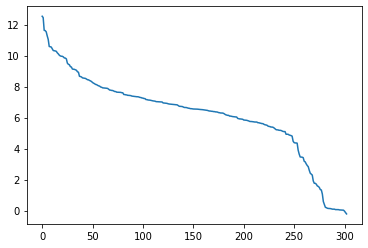

In [37]:
plt.plot(df.PROFIT.sort_values(ascending=False).values)

In [182]:
df.isna().sum()

SECID                       0
SHORTNAME                   0
NAME                        0
TYPENAME                    0
ISIN                        0
REGNUMBER                   6
LISTLEVEL                   0
FACEVALUE                   0
FACEUNIT                    0
ISSUESIZE                   0
IS_COLLATERAL               0
IS_EXTERNAL                 0
PRIMARY_BOARDID             0
PRIMARY_BOARD_TITLE         0
MATDATE                     1
IS_RII                    363
DURATION                   78
ISSUEDATE                   0
EVENINGSESSION              0
IS_QUALIFIED_INVESTORS      0
HIGH_RISK                   0
COUPONFREQUENCY            53
YIELDATWAP                157
COUPONDATE                  0
COUPONPERCENT              10
COUPONVALUE                10
COUPONDAYSPASSED            0
COUPONDAYSREMAIN            0
COUPONLENGTH                0
ISSUEDATE.1                 0
INITIALFACEVALUE            0
SECSUBTYPE                345
STARTDATEMOEX               4
DAYSTOREDE

In [ ]:
len(df)